## THE SPARKS FOUNDATION
DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP(GRIP MAY-2022)

**AUTHOR:** Jenin Johna

**Objective:** Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices,and
sentimental analysis of news headlines.

In [118]:
#installing the required libraries
#!pip install nltk
#!pip install matplotlib

In [154]:
import pandas as pd
import numpy as np
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentAnalyzer
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error


In [122]:
#loading the datasets
df_prices = pd.read_csv('BSESN.csv')
df_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-14,41883.089844,41994.261719,41770.898438,41952.628906,41952.628906,14100.0
1,2020-01-15,41969.859375,41969.859375,41648.109375,41872.730469,41872.730469,6100.0
2,2020-01-16,41924.738281,42059.449219,41812.281250,41932.558594,41932.558594,6600.0
3,2020-01-17,41929.019531,42063.929688,41850.289063,41945.371094,41945.371094,9500.0
4,2020-01-20,42263.000000,42273.871094,41503.371094,41528.910156,41528.910156,7500.0
...,...,...,...,...,...,...,...
247,2021-01-08,48464.910156,48854.339844,48365.578125,48782.511719,48782.511719,22200.0
248,2021-01-11,49252.308594,49303.789063,48956.378906,49269.320313,49269.320313,21200.0
249,2021-01-12,49228.261719,49569.140625,49079.570313,49517.109375,49517.109375,12700.0
250,2021-01-13,49763.929688,49795.191406,49073.851563,49492.320313,49492.320313,27200.0


In [123]:
df_news = pd.read_csv('india-news-headlines.csv')
df_news

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [124]:
#Converting to datetime format
df_news['publish_date'] = pd.to_datetime(df_news['publish_date'],format= '%Y%m%d')
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-14,41883.089844,41994.261719,41770.898438,41952.628906,41952.628906,14100.0
1,2020-01-15,41969.859375,41969.859375,41648.109375,41872.730469,41872.730469,6100.0
2,2020-01-16,41924.738281,42059.449219,41812.281250,41932.558594,41932.558594,6600.0
3,2020-01-17,41929.019531,42063.929688,41850.289063,41945.371094,41945.371094,9500.0
4,2020-01-20,42263.000000,42273.871094,41503.371094,41528.910156,41528.910156,7500.0
...,...,...,...,...,...,...,...
247,2021-01-08,48464.910156,48854.339844,48365.578125,48782.511719,48782.511719,22200.0
248,2021-01-11,49252.308594,49303.789063,48956.378906,49269.320313,49269.320313,21200.0
249,2021-01-12,49228.261719,49569.140625,49079.570313,49517.109375,49517.109375,12700.0
250,2021-01-13,49763.929688,49795.191406,49073.851563,49492.320313,49492.320313,27200.0


In [125]:
#dropping any null entries in our data
df_prices.dropna(axis=0, inplace=True)
# dropping duplicates in data
df_prices = df_prices.drop_duplicates()
df_prices.set_index('Date', inplace= True)

In [126]:
#df_prices['Date']

In [127]:
df_news = df_news.drop_duplicates()
df_news

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,2022-03-31,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,2022-03-31,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,2022-03-31,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,2022-03-31,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [128]:
df_news = df_news.groupby(['publish_date'])['headline_text'].apply(lambda x : ','.join(x)).reset_index()
df_news.set_index('publish_date', inplace= True)

# sorting the data according to the Date
df_news = df_news.sort_index(ascending=True, axis=0)
df_news

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2022-03-27,Playing a dead man in Body God meant sitting i...
2022-03-28,As fashion becomes democratic; demand for styl...
2022-03-29,Bobby Deol: Like my dad; I hope to be working ...


In [129]:
#Joining both datasets 
stock_data = pd.concat([df_prices,df_news], axis=1)
stock_data.dropna(axis=0, inplace=True)
stock_data

,Open,High,Low,Close,Adj Close,Volume,headline_text
2020-01-14,41883.089844,41994.261719,41770.898438,41952.628906,41952.628906,14100.0,Officer to be appointed for Smart City project...
2020-01-15,41969.859375,41969.859375,41648.109375,41872.730469,41872.730469,6100.0,makar sankranti quotes wishes messages status ...
2020-01-16,41924.738281,42059.449219,41812.281250,41932.558594,41932.558594,6600.0,Horoscope Today; January 16; 2020: Check astro...
2020-01-17,41929.019531,42063.929688,41850.289063,41945.371094,41945.371094,9500.0,Close shave for passengers as bus overshoots r...
2020-01-20,42263.000000,42273.871094,41503.371094,41528.910156,41528.910156,7500.0,Horoscope Today; January 20; 2020: Check astro...
...,...,...,...,...,...,...,...
2021-01-08,48464.910156,48854.339844,48365.578125,48782.511719,48782.511719,22200.0,"Infra push can help boost consumption,CM Yogi ..."
2021-01-11,49252.308594,49303.789063,48956.378906,49269.320313,49269.320313,21200.0,"Health benefits of apple cider vinegar,Securit..."
2021-01-12,49228.261719,49569.140625,49079.570313,49517.109375,49517.109375,12700.0,"Coal demand-supply balance a challenge,how to ..."
2021-01-13,49763.929688,49795.191406,49073.851563,49492.320313,49492.320313,27200.0,College Board India Scholars earn full-tuition...


In [130]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [131]:
#!pip install Textblob

In [133]:
#Adding subjectivity and polarity columns
from textblob import TextBlob

from nltk.stem.porter import PorterStemmer

stock_data['Subjectivity'] = stock_data['headline_text'].apply(getSubjectivity)
stock_data['Polarity'] = stock_data['headline_text'].apply(getPolarity)
stock_data

,Open,High,Low,Close,Adj Close,Volume,headline_text,Subjectivity,Polarity
2020-01-14,41883.089844,41994.261719,41770.898438,41952.628906,41952.628906,14100.0,Officer to be appointed for Smart City project...,0.427173,0.078723
2020-01-15,41969.859375,41969.859375,41648.109375,41872.730469,41872.730469,6100.0,makar sankranti quotes wishes messages status ...,0.394171,0.062287
2020-01-16,41924.738281,42059.449219,41812.281250,41932.558594,41932.558594,6600.0,Horoscope Today; January 16; 2020: Check astro...,0.405576,0.056096
2020-01-17,41929.019531,42063.929688,41850.289063,41945.371094,41945.371094,9500.0,Close shave for passengers as bus overshoots r...,0.409789,0.003173
2020-01-20,42263.000000,42273.871094,41503.371094,41528.910156,41528.910156,7500.0,Horoscope Today; January 20; 2020: Check astro...,0.384725,0.019839
...,...,...,...,...,...,...,...,...,...
2021-01-08,48464.910156,48854.339844,48365.578125,48782.511719,48782.511719,22200.0,"Infra push can help boost consumption,CM Yogi ...",0.400304,0.044183
2021-01-11,49252.308594,49303.789063,48956.378906,49269.320313,49269.320313,21200.0,"Health benefits of apple cider vinegar,Securit...",0.420961,0.011808
2021-01-12,49228.261719,49569.140625,49079.570313,49517.109375,49517.109375,12700.0,"Coal demand-supply balance a challenge,how to ...",0.393077,-0.015068
2021-01-13,49763.929688,49795.191406,49073.851563,49492.320313,49492.320313,27200.0,College Board India Scholars earn full-tuition...,0.378404,0.094377


In [134]:
# Here we are using SentimentIntensityAnalyzer to get the compound scores
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

stock_data['Compound'] = [sia.polarity_scores(v)['compound'] for v in stock_data['headline_text']]
stock_data['Negative'] = [sia.polarity_scores(v)['neg'] for v in stock_data['headline_text']]
stock_data['Neutral'] = [sia.polarity_scores(v)['neu'] for v in stock_data['headline_text']]
stock_data['Positive'] = [sia.polarity_scores(v)['pos'] for v in stock_data['headline_text']]
stock_data

,Open,High,Low,Close,Adj Close,Volume,headline_text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
2020-01-14,41883.089844,41994.261719,41770.898438,41952.628906,41952.628906,14100.0,Officer to be appointed for Smart City project...,0.427173,0.078723,-0.9999,0.158,0.772,0.071
2020-01-15,41969.859375,41969.859375,41648.109375,41872.730469,41872.730469,6100.0,makar sankranti quotes wishes messages status ...,0.394171,0.062287,-0.9998,0.142,0.768,0.089
2020-01-16,41924.738281,42059.449219,41812.281250,41932.558594,41932.558594,6600.0,Horoscope Today; January 16; 2020: Check astro...,0.405576,0.056096,-0.9998,0.130,0.801,0.070
2020-01-17,41929.019531,42063.929688,41850.289063,41945.371094,41945.371094,9500.0,Close shave for passengers as bus overshoots r...,0.409789,0.003173,-0.9999,0.156,0.779,0.065
2020-01-20,42263.000000,42273.871094,41503.371094,41528.910156,41528.910156,7500.0,Horoscope Today; January 20; 2020: Check astro...,0.384725,0.019839,-0.9997,0.115,0.819,0.066
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-08,48464.910156,48854.339844,48365.578125,48782.511719,48782.511719,22200.0,"Infra push can help boost consumption,CM Yogi ...",0.400304,0.044183,-0.9999,0.156,0.787,0.057
2021-01-11,49252.308594,49303.789063,48956.378906,49269.320313,49269.320313,21200.0,"Health benefits of apple cider vinegar,Securit...",0.420961,0.011808,-0.9999,0.152,0.783,0.065
2021-01-12,49228.261719,49569.140625,49079.570313,49517.109375,49517.109375,12700.0,"Coal demand-supply balance a challenge,how to ...",0.393077,-0.015068,-0.9999,0.156,0.772,0.072
2021-01-13,49763.929688,49795.191406,49073.851563,49492.320313,49492.320313,27200.0,College Board India Scholars earn full-tuition...,0.378404,0.094377,-0.9990,0.080,0.877,0.044


In [135]:
stock_data.drop('headline_text', axis = 1, inplace=True)
#stock_data.drop('News', axis=1, inplace=True)

In [136]:
# getting our data series ready for Multivariate Time Series Forecasting
from pandas import DataFrame as df
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df1 = df(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df1.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df1.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [144]:
from sklearn.preprocessing import MinMaxScaler
values = stock_data.values
values = values.astype('float32')
# normalize features
print(values.shape)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[12,13,14,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
print(reframed.columns)

(250, 12)
Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var12(t-1)', 'var4(t)'],
      dtype='object')


In [155]:
# split into train and test sets
values = reframed.values
print((values).shape)
n_train_hours = 200
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(249, 13)
(200, 1, 12) (200,) (49, 1, 12) (49,)


#### Here we are going to use LSTM on the data we got after doing sentimental analysis 

Epoch 1/50
3/3 - 3s - loss: 0.4959 - val_loss: 0.8909
Epoch 2/50
3/3 - 0s - loss: 0.4523 - val_loss: 0.8322
Epoch 3/50
3/3 - 0s - loss: 0.4093 - val_loss: 0.7731
Epoch 4/50
3/3 - 0s - loss: 0.3662 - val_loss: 0.7133
Epoch 5/50
3/3 - 0s - loss: 0.3230 - val_loss: 0.6527
Epoch 6/50
3/3 - 0s - loss: 0.2805 - val_loss: 0.5911
Epoch 7/50
3/3 - 0s - loss: 0.2392 - val_loss: 0.5284
Epoch 8/50
3/3 - 0s - loss: 0.2002 - val_loss: 0.4648
Epoch 9/50
3/3 - 0s - loss: 0.1672 - val_loss: 0.4016
Epoch 10/50
3/3 - 0s - loss: 0.1408 - val_loss: 0.3394
Epoch 11/50
3/3 - 0s - loss: 0.1184 - val_loss: 0.2791
Epoch 12/50
3/3 - 0s - loss: 0.1019 - val_loss: 0.2221
Epoch 13/50
3/3 - 0s - loss: 0.0936 - val_loss: 0.1722
Epoch 14/50
3/3 - 0s - loss: 0.0957 - val_loss: 0.1366
Epoch 15/50
3/3 - 0s - loss: 0.1019 - val_loss: 0.1227
Epoch 16/50
3/3 - 0s - loss: 0.1023 - val_loss: 0.1273
Epoch 17/50
3/3 - 0s - loss: 0.0968 - val_loss: 0.1442
Epoch 18/50
3/3 - 0s - loss: 0.0905 - val_loss: 0.1641
Epoch 19/50
3/3 - 0

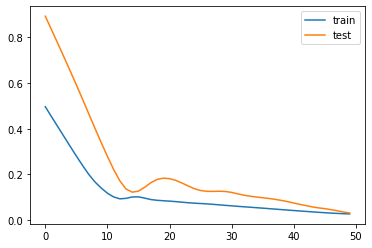

In [146]:
# design the network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam') 

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [156]:
# make a prediction
print(test_X.shape)
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[2]))
print(test_X.shape)
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)


(49, 1, 12)
(49, 1, 12)
(49, 12)
Test RMSE: 903.163


This is a pretty good RMSE, considering the sensex prices are in the order of 4 (for eg, around 48k units).